In [1]:
import structuralcodes as sc
import matplotlib.pyplot as plt
import numpy as np

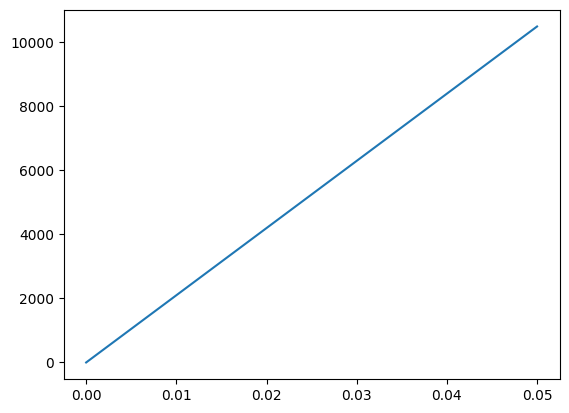

In [2]:
el = sc.materials.constitutive_laws.Elastic(210000)
strain = np.linspace(0,0.05,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el.get_stress(strain[i])

plt.plot(strain,stress)

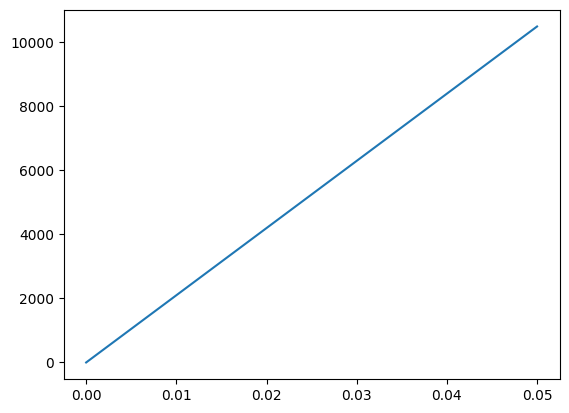

In [3]:
el = sc.materials.constitutive_laws.Elastic(E = 210000)
strain = np.linspace(0,0.05,200)
stress = el.get_stress(strain)
plt.plot(strain,stress)

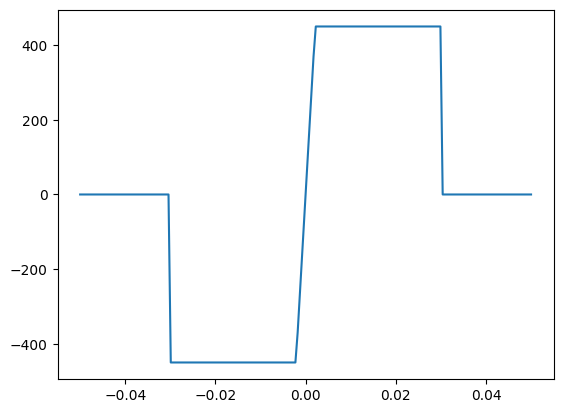

In [4]:
el = sc.materials.constitutive_laws.ElasticPlastic(210000,450, eps_su = 0.03)
strain = np.linspace(-0.05,0.05,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el.get_stress(strain[i])

plt.plot(strain,stress)


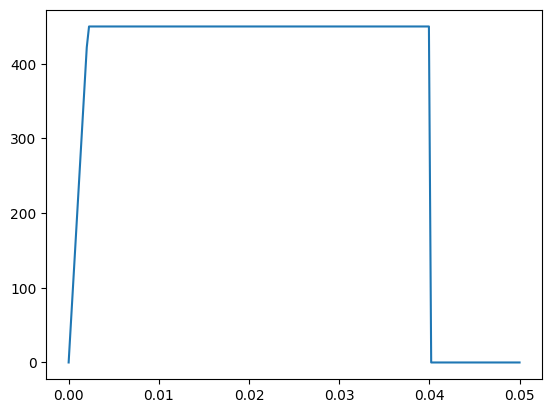

In [5]:
el = sc.materials.constitutive_laws.ElasticPlastic(210000,450,eps_su = 0.04)
strain = np.linspace(0,0.05,200)
stress = el.get_stress(strain)

plt.plot(strain,stress)

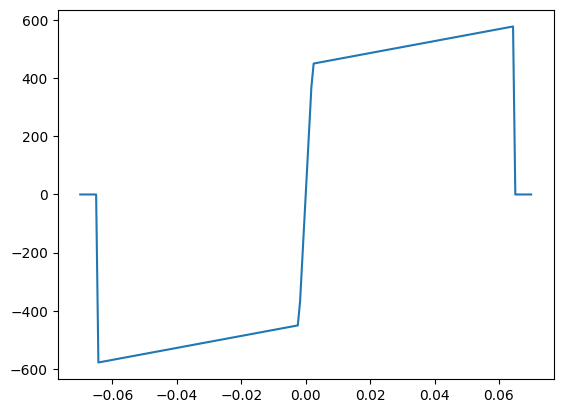

In [6]:
el = sc.materials.constitutive_laws.ElasticPlastic(210000,450, eps_su = 0.065, Eh = 2060)
strain = np.linspace(-0.07,0.07,200)
stress = el.get_stress(strain)

plt.plot(strain,stress)

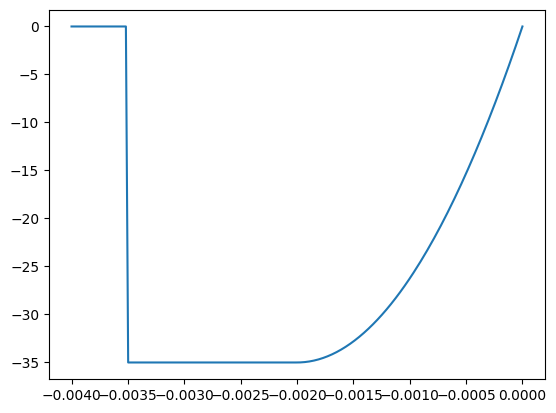

In [7]:
el = sc.materials.constitutive_laws.ParabolaRectangle(fc=-35)
strain = np.linspace(0,-0.004,200)
stress = np.zeros_like(strain)
for i in range(len(strain)):
    stress[i] = el.get_stress(strain[i])

plt.plot(strain,stress)

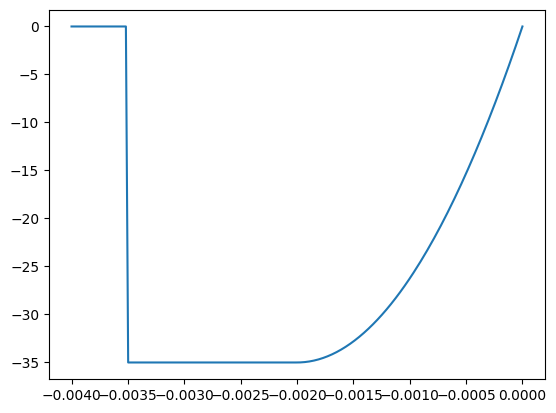

In [8]:
el = sc.materials.constitutive_laws.ParabolaRectangle(fc=-35)
strain = np.linspace(0,-0.004,200)
plt.plot(strain,el.get_stress(strain))

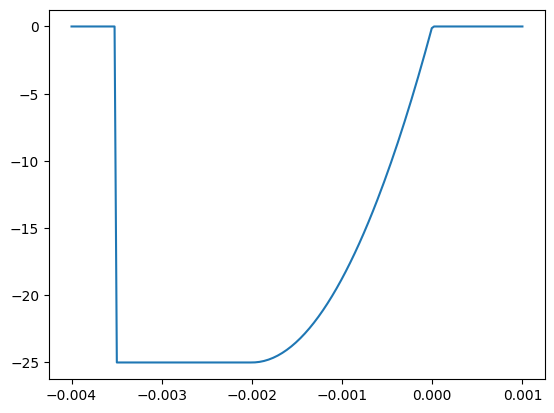

In [9]:
sc.set_design_code('mc2010')
C25 = sc.materials.concrete.create_concrete(25,'C25')

strain = np.linspace(0.001,-0.004,200)

plt.plot(strain,C25.stress_strain.get_stress(strain))
